In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageFilter
import numpy as np
import cv2
import shutil
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-06-25 17:59:08.557736: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def display_images(folder_path, n_images=10):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpeg', 'jpg', 'png'))]

    plt.figure(figsize=(15, 15))
    for i, image_file in enumerate(image_files[:n_images]):
        img = Image.open(os.path.join(folder_path, image_file))
        plt.subplot(1, n_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

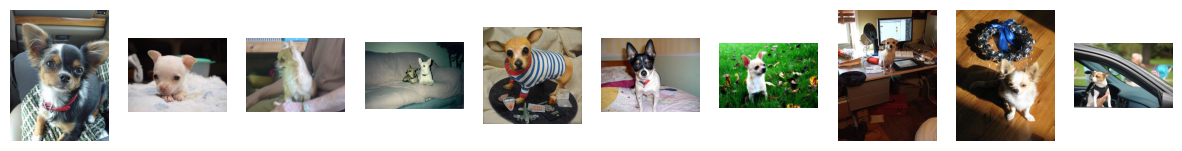

In [3]:
display_images('n02085620-Chihuahua')

In [4]:
def image_statistics(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpeg', 'jpg', 'png'))]

    widths = []
    heights = []
    aspect_ratios = []

    for image_file in image_files:
        img = Image.open(os.path.join(folder_path, image_file))
        width, height = img.size
        widths.append(width)
        heights.append(height)
        aspect_ratios.append(width / height)

    print(f'Average Width: {np.mean(widths)}')
    print(f'Average Height: {np.mean(heights)}')
    print(f'Average Aspect Ratio: {np.mean(aspect_ratios)}')

In [5]:
image_statistics('n02085620-Chihuahua')

Average Width: 459.63157894736844
Average Height: 406.11842105263156
Average Aspect Ratio: 1.164397524003902


In [6]:
def color_distribution(folder_path, n_images=1):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpeg', 'jpg', 'png'))]

    for image_file in image_files[:n_images]:
        img = Image.open(os.path.join(folder_path, image_file))
        img_array = np.array(img)

        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Original Image')

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.hist(img_array[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
        plt.title('Red Channel')

        plt.subplot(1, 3, 2)
        plt.hist(img_array[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
        plt.title('Green Channel')

        plt.subplot(1, 3, 3)
        plt.hist(img_array[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
        plt.title('Blue Channel')

        plt.show()

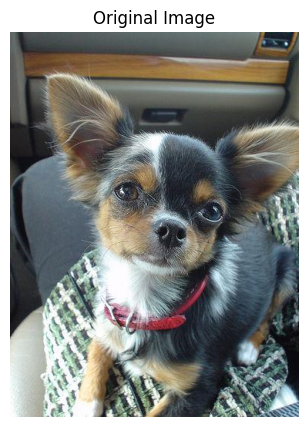

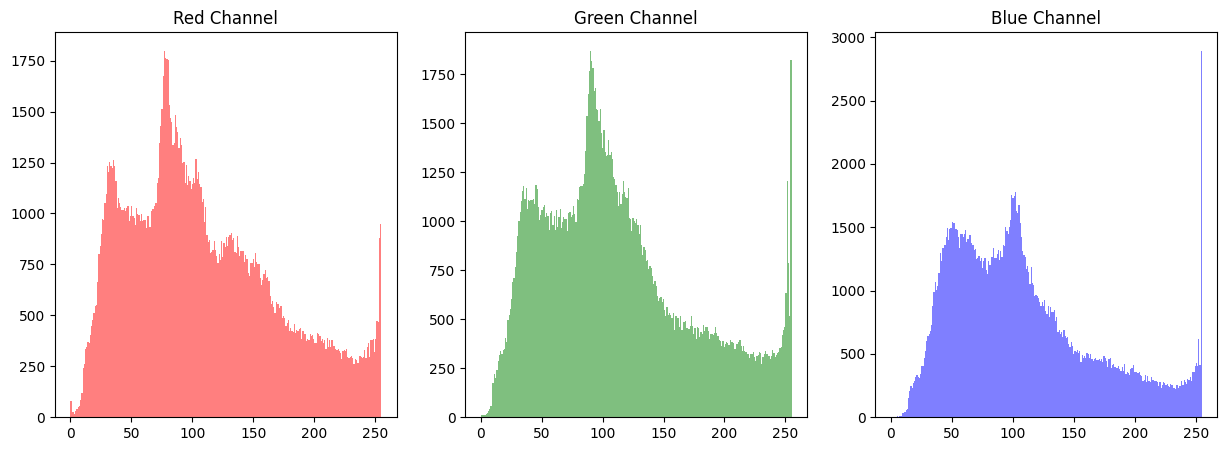

In [7]:
# Example usage
color_distribution('n02085620-Chihuahua')

In [8]:
# Exemple d'opération de retraitement d'images : passage de l'image en gris
def convert_to_grayscale(image_path):
    color_image = cv2.imread(image_path)
    # Convertion de l'image en couleur vers une image en gris
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
    return gray_image

In [9]:
gray_image_test = convert_to_grayscale("n02085620-Chihuahua/n02085620_7.jpg")

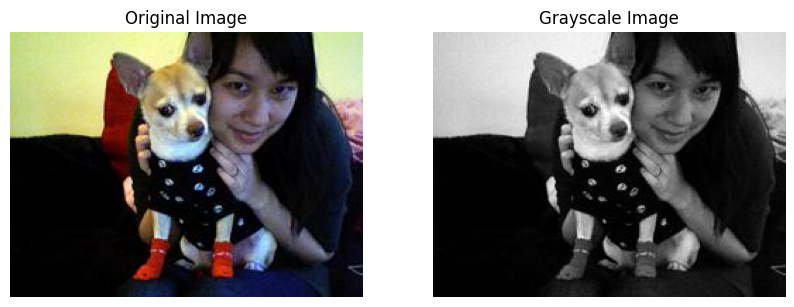

In [10]:
# Visualisation de l'image original et de l'image en gris
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(cv2.imread("n02085620-Chihuahua/n02085620_7.jpg"), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Grayscale Image")
plt.imshow(gray_image_test, cmap='gray')
plt.axis('off')

plt.show()

In [11]:
# Autre exemple d'opération de retraitement d'image : filtrage du bruit
# Lissage par moyenne
def apply_box_blur(image):
    pil_image = Image.fromarray(image)
    # Application du filtre
    blurred_image = pil_image.filter(ImageFilter.BoxBlur(1))
    return blurred_image

In [12]:
gray_image_noiseless_test = apply_box_blur(gray_image_test)

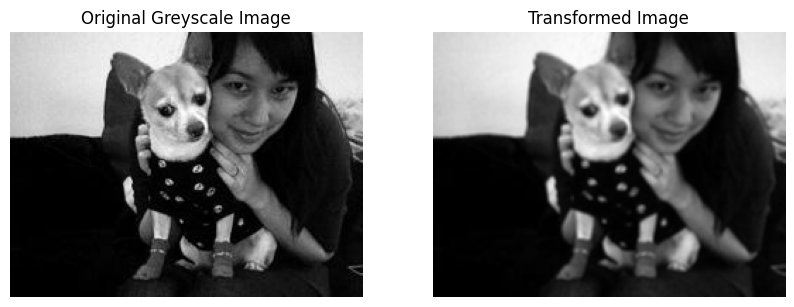

In [13]:
# Visualisation de l'image original et de l'image en gris
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Greyscale Image")
plt.imshow(gray_image_test, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Transformed Image")
plt.imshow(gray_image_noiseless_test, cmap='gray')
plt.axis('off')

plt.show()

In [14]:
# Redimensionnement
target_size = (224, 224)

def resize_img(image, target_size):
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [15]:
# Egalisation d'histogramme
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    # Egalisation de l'histogram sur le Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # Convertion de l'image YUV en image RGB
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_output

In [16]:
# Visualisation de l'égalisation d'histogramme
image_test = cv2.imread('n02085620-Chihuahua/n02085620_4700.jpg')
image_test_equalized = histogram_equalization(image_test)

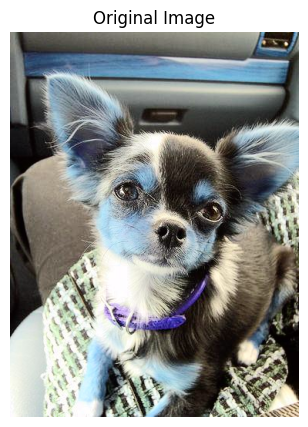

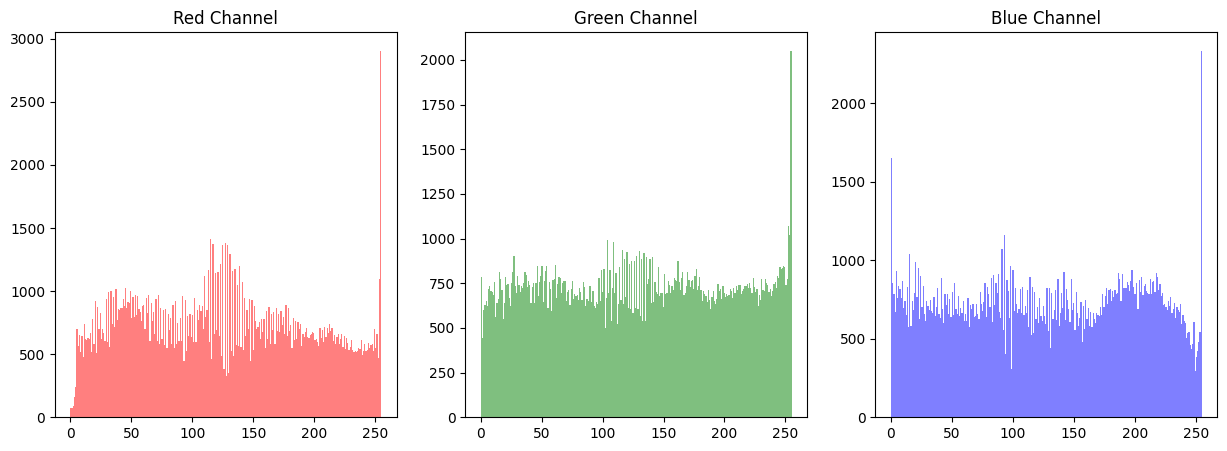

In [17]:
image_test_equalized_array = np.array(image_test_equalized)

plt.figure(figsize=(5, 5))
plt.imshow(image_test_equalized)
plt.axis('off')
plt.title('Original Image')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(image_test_equalized_array[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.hist(image_test_equalized_array[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.hist(image_test_equalized_array[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel')

plt.show()

In [18]:
# Whitening
def whitening(X):
    X_norm = X / 255.

    X_norm.mean(axis=0).shape

    X_norm.mean(axis=0)

    cov = np.cov(X_norm, rowvar=True)

    U, S, V = np.linalg.svd(cov)

    epsilon = 0.1
    X_ZCA = U.dot(np.diag(1.0 / np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)
    X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
    return X_ZCA_rescaled

In [19]:
# Pretraitement des images sur 10 races de chiens
folder_paths = [
    "n02086646-Blenheim-spaniel",
    "n02091831-Saluki",
    "n02099712-Labrador-retriever",
    "n02085620-Chihuahua",
    "n02088364-beagle",
    "n02091467-Norwegian-elkhound",
    "n02109525-Saint-Bernard",
    "n02110958-pug",
    "n02112018-Pomeranian",
    "n02116738-African-hunting-dog",
]

output_folder = "output_folder"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

target_size = (224, 224)

# Iteration sur chaque fichier de races de chien
for folder_path in folder_paths:
    print(f"Processing images in folder: {folder_path}")

    # List pour sauvegarder les images redimensionnées et égalisées
    images = []

    # Iteration sur chaque image du fichier
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            file_path = os.path.join(folder_path, filename)

            image = cv2.imread(file_path)

            if image is not None:
                # Redimensionnement
                resized_image = resize_img(image, target_size)

                # Egalisation d'histogramme
                equalized_image = histogram_equalization(resized_image)

                images.append(equalized_image)
            else:
                print(f"Error loading image: {file_path}")

    # Convertion de la liste d'images en array numpy
    images_array = np.array(images)

    # Reshape de l'array pour le whitening
    X = images_array.reshape(images_array.shape[0], images_array.shape[1] * images_array.shape[2] * images_array.shape[3])
    
    # Whitening
    whitened_images_array = whitening(X)

    # Sauvegarde les images dans l'output folder avec le label de la race de chien
    for i in range(whitened_images_array.shape[0]):
        image = (whitened_images_array[i, :].reshape(224, 224, 3) * 255).astype(np.uint8)
        img = Image.fromarray(image)
        img.save(f'output_folder/{folder_path}_{i}.png')

    print(f"Processed and saved images from {folder_path}.")

print(f"All images processed and saved in the '{output_folder}' folder.")

Processing images in folder: n02086646-Blenheim-spaniel
Processed and saved images from n02086646-Blenheim-spaniel.
Processing images in folder: n02091831-Saluki
Processed and saved images from n02091831-Saluki.
Processing images in folder: n02099712-Labrador-retriever
Processed and saved images from n02099712-Labrador-retriever.
Processing images in folder: n02085620-Chihuahua
Processed and saved images from n02085620-Chihuahua.
Processing images in folder: n02088364-beagle
Processed and saved images from n02088364-beagle.
Processing images in folder: n02091467-Norwegian-elkhound
Processed and saved images from n02091467-Norwegian-elkhound.
Processing images in folder: n02109525-Saint-Bernard
Processed and saved images from n02109525-Saint-Bernard.
Processing images in folder: n02110958-pug
Processed and saved images from n02110958-pug.
Processing images in folder: n02112018-Pomeranian
Processed and saved images from n02112018-Pomeranian.
Processing images in folder: n02116738-African

In [20]:
# Sauvegarde les images dans des sous-dossiers en fonction de chaque race de chien
# Input et output folders
input_folder = 'output_folder'
output_folder = 'ten_breed_organized_output_folder'

os.makedirs(output_folder, exist_ok=True)

# Iteration sur chaque image de l'input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Extrait la race du chien du nom du fichier
        breed = filename.split('_')[0]

        # Crée un sous-fichier pour la race du chien
        breed_folder = os.path.join(output_folder, breed)
        os.makedirs(breed_folder, exist_ok=True)

        src_path = os.path.join(input_folder, filename)
        dst_path = os.path.join(breed_folder, filename)

        shutil.move(src_path, dst_path)
        print(f"Moved {filename} to {breed_folder}")

print("Image organization completed.")

Moved n02091467-Norwegian-elkhound_15.png to ten_breed_organized_output_folder/n02091467-Norwegian-elkhound
Moved n02085620-Chihuahua_137.png to ten_breed_organized_output_folder/n02085620-Chihuahua
Moved n02110958-pug_43.png to ten_breed_organized_output_folder/n02110958-pug
Moved n02110958-pug_57.png to ten_breed_organized_output_folder/n02110958-pug
Moved n02085620-Chihuahua_123.png to ten_breed_organized_output_folder/n02085620-Chihuahua
Moved n02112018-Pomeranian_9.png to ten_breed_organized_output_folder/n02112018-Pomeranian
Moved n02109525-Saint-Bernard_149.png to ten_breed_organized_output_folder/n02109525-Saint-Bernard
Moved n02091467-Norwegian-elkhound_29.png to ten_breed_organized_output_folder/n02091467-Norwegian-elkhound
Moved n02109525-Saint-Bernard_17.png to ten_breed_organized_output_folder/n02109525-Saint-Bernard
Moved n02109525-Saint-Bernard_161.png to ten_breed_organized_output_folder/n02109525-Saint-Bernard
Moved n02099712-Labrador-retriever_128.png to ten_breed_org

In [21]:
# Répartit les images en jeu d'entraînement, jeu de validation et jeu de test 
input_folder = 'ten_breed_organized_output_folder'
output_folder = 'ten_breed_split_dataset'

# Jeu d'entraînement (70% du dataset), jeu de validation (20%), et jeu de test (10%)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.2, 0.1))

In [22]:
def visualize_augmentation(image_path, n_augmented_images=9):
    # Load the image
    img = Image.open(image_path)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Set up the ImageDataGenerator with augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Create an iterator
    it = datagen.flow(img_array, batch_size=1)

    # Generate and display the augmented images
    plt.figure(figsize=(15, 15))
    for i in range(n_augmented_images):
        plt.subplot(3, 3, i + 1)
        batch = next(it)  # Use the next function
        aug_image = batch[0].astype('uint8')
        plt.imshow(aug_image)
        plt.axis('off')
    plt.show()

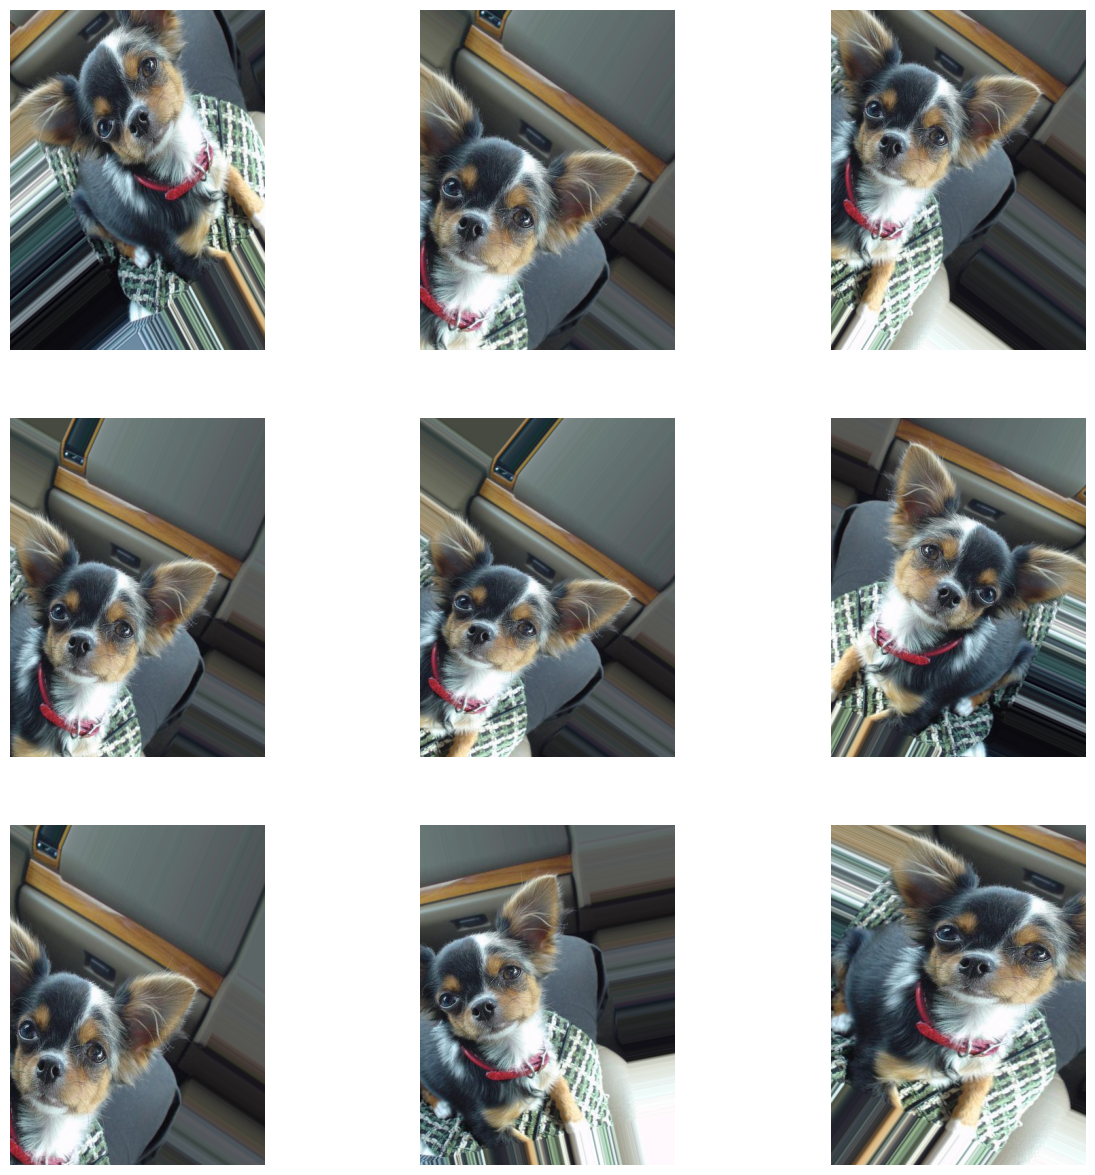

In [23]:
# Example usage
visualize_augmentation('n02085620-Chihuahua/n02085620_4700.jpg')

In [24]:
# Dummy classifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Fonction pour charger des images depuis un fichier
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            # Resize image to 224x224 pixels (assuming images are the same size)
            img = cv2.resize(img, (224, 224))
            images.append(img)
    return images

In [25]:
# Fonction pour créer un dataframe contenant les images
def create_dataframe(images, labels):
    # Flatten each image into a 1D vector
    flattened_images = [img.flatten() for img in images]

    # Convert to numpy array
    image_matrix = np.array(flattened_images)

    # Create DataFrame with flattened images
    df = pd.DataFrame(image_matrix)

    # Add column for one-hot encoded labels
    df['Label'] = labels

    return df

In [26]:
# Chemins d'accès pour chaque races de chiens
breeds = ['n02086646-Blenheim-spaniel', 'n02091831-Saluki', 'n02099712-Labrador-retriever',
          "n02085620-Chihuahua", "n02088364-beagle", "n02091467-Norwegian-elkhound", "n02109525-Saint-Bernard",
          "n02110958-pug", "n02112018-Pomeranian","n02116738-African-hunting-dog"]
folder_path = 'ten_breed_organized_output_folder'

In [27]:
# Chargement des images et des labels
images = []
labels = []
for i, breed in enumerate(breeds):
    breed_folder = os.path.join(folder_path, breed)
    breed_images = load_images_from_folder(breed_folder)
    images.extend(breed_images)
    labels.extend([i] * len(breed_images))

In [28]:
# Convertion des labels en array numpy
labels = np.array(labels)

In [29]:
# Création du dataframe
df = create_dataframe(images, labels)

In [30]:
# Encodage des labels
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = encoded_labels.reshape(-1, 1)
onehot_labels = onehot_encoder.fit_transform(encoded_labels)

In [31]:
# Convertion de la sparse matrix en dense numpy array
onehot_labels = onehot_labels.toarray()

In [32]:
# Ajout des labels one-hot encoded au dataframe
df['Label_Blenheim_spaniel'] = onehot_labels[:, 0]
df['Label_Labrador_retriever'] = onehot_labels[:, 1]
df['Label_Saluki'] = onehot_labels[:, 2]
df['Label_Chihuahua'] = onehot_labels[:, 3]
df['Label_beagle'] = onehot_labels[:, 4]
df['Label_Norwegian-elkhound'] = onehot_labels[:, 5]
df['Label_Saint-Bernard'] = onehot_labels[:, 6]
df['Label_pug'] = onehot_labels[:, 7]
df['Label_Pomeranian'] = onehot_labels[:, 8]
df['Label_African-hunting-dog'] = onehot_labels[:, 9]

In [33]:
last_10_columns_tail = df.tail().iloc[:, -10:]
print(last_10_columns_tail)

      Label_Blenheim_spaniel  Label_Labrador_retriever  Label_Saluki  \
1855                     0.0                       0.0           0.0   
1856                     0.0                       0.0           0.0   
1857                     0.0                       0.0           0.0   
1858                     0.0                       0.0           0.0   
1859                     0.0                       0.0           0.0   

      Label_Chihuahua  Label_beagle  Label_Norwegian-elkhound  \
1855              0.0           0.0                       0.0   
1856              0.0           0.0                       0.0   
1857              0.0           0.0                       0.0   
1858              0.0           0.0                       0.0   
1859              0.0           0.0                       0.0   

      Label_Saint-Bernard  Label_pug  Label_Pomeranian  \
1855                  0.0        0.0               0.0   
1856                  0.0        0.0               0.0   
18

In [34]:
# Mélange du dataframe
shuffled_df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

In [35]:
shuffled_last_10_columns_tail = shuffled_df.tail().iloc[:, -10:]
print(shuffled_last_10_columns_tail)

      Label_Blenheim_spaniel  Label_Labrador_retriever  Label_Saluki  \
1855                     0.0                       0.0           0.0   
1856                     0.0                       0.0           0.0   
1857                     0.0                       0.0           0.0   
1858                     0.0                       0.0           0.0   
1859                     0.0                       0.0           0.0   

      Label_Chihuahua  Label_beagle  Label_Norwegian-elkhound  \
1855              0.0           0.0                       0.0   
1856              0.0           0.0                       0.0   
1857              0.0           1.0                       0.0   
1858              0.0           0.0                       0.0   
1859              0.0           0.0                       0.0   

      Label_Saint-Bernard  Label_pug  Label_Pomeranian  \
1855                  1.0        0.0               0.0   
1856                  0.0        1.0               0.0   
18

In [36]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Features et targets
X = shuffled_df.drop(['Label', 'Label_Blenheim_spaniel', 'Label_Labrador_retriever', 'Label_Saluki',
                      "Label_Chihuahua", "Label_beagle", "Label_Norwegian-elkhound", "Label_Saint-Bernard",
                      "Label_pug", "Label_Pomeranian", "Label_African-hunting-dog"], axis=1)
y = shuffled_df[['Label_Blenheim_spaniel', 'Label_Labrador_retriever', 'Label_Saluki',
                 "Label_Chihuahua", "Label_beagle", "Label_Norwegian-elkhound", "Label_Saint-Bernard",
                 "Label_pug", "Label_Pomeranian", "Label_African-hunting-dog"]]

# Séparation en jeu d'entraînements et en jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Entraînement du DummyClassifier
dummy_classifier = DummyClassifier(strategy='stratified')  # Choose a strategy based on your task
dummy_classifier.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [38]:
# Evaluation de la performance du DummyClassifier
accuracy = dummy_classifier.score(X_test, y_test)
print(f"Dummy Classifier Accuracy: {accuracy}")

Dummy Classifier Accuracy: 0.03225806451612903
